# **Capstone Project 1 - Inferential Statistics**
Now that we've learned the basics of inferential statistics and hypothesis testing, let's apply that to the Capstone Project



Let's do a quick recap of all the datasets associated with the capstone project by doing a preview of the data. 

In [451]:
%matplotlib inline
import pandas as pd
import pylab as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [452]:
df_case_status = df = pd.read_excel('data/case-status.xls',header=1)
df_case_status.head()

,Year,Type,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending,Target
0,2012,Initial,152431,5395,157826,3629,124055.0,38024.0,1680,0,150751,1
1,2013,Initial,427616,16351,443967,1697,445013.0,77747.0,470352,10975,97040,0
2,2014,Initial,122424,19127,141551,488,NaN,NaN,136101,20989,62374,1
3,2014,Renewal,116476,5760,122236,1370,NaN,NaN,22235,0,94238,0
4,2015,Initial,85303,7477,92780,338,NaN,NaN,90613,19070,37994,1


### Let's add couple of calculated columns like Accepted & Rejected Percentage

In [453]:
for lab, row in df_case_status.iterrows() :
    df_case_status["Accepted_Percentage"] = round(df_case_status["Accepted"]/df_case_status['Received']  * 100,1)
    df_case_status["Rejection_Percentage"] = round(df_case_status["Rejected"]/df_case_status['Received']  * 100,1)
df_case_status

,Year,Type,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending,Target,Accepted_Percentage,Rejection_Percentage
0,2012,Initial,152431,5395,157826,3629,124055.0,38024.0,1680,0,150751,1,96.6,3.4
1,2013,Initial,427616,16351,443967,1697,445013.0,77747.0,470352,10975,97040,0,96.3,3.7
2,2014,Initial,122424,19127,141551,488,NaN,NaN,136101,20989,62374,1,86.5,13.5
3,2014,Renewal,116476,5760,122236,1370,NaN,NaN,22235,0,94238,0,95.3,4.7
4,2015,Initial,85303,7477,92780,338,NaN,NaN,90613,19070,37994,1,91.9,8.1
5,2015,Renewal,363553,27997,391550,1443,NaN,NaN,419394,2285,36112,0,92.8,7.2
6,2016,Initial,73362,1204,74566,291,NaN,NaN,52789,11398,47169,1,98.4,1.6
7,2016,Renewal,187339,11113,198452,744,NaN,NaN,145913,3029,74509,0,94.4,5.6
8,2017,Initial,45557,42,45599,194,NaN,NaN,47445,9248,36033,1,99.9,0.1
9,2017,Renewal,427316,43387,470703,1602,NaN,NaN,415268,3945,82612,0,90.8,9.2


### Accepted Percentage Trend from 2012 to 2017
After Trump became the president of United States, there was no signigicant change in the trend on how the application was accepted.

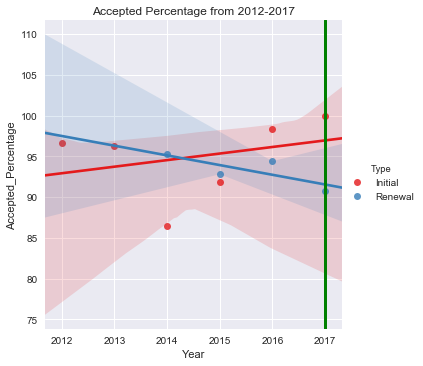

In [454]:
sns.lmplot(x='Year', y='Accepted_Percentage', data=df_case_status, hue='Type', palette='Set1')
# Display the plot
plt.title('Accepted Percentage from 2012-2017')
plt.axvline(x=2017, linewidth=3, color='green')
plt.show()

### Examine the Mean, Std, min, max and percentile for case status from 2012-2017


In [455]:
df_case_status.describe()

,Year,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending,Target,Accepted_Percentage,Rejection_Percentage
count,10.00000,10.000000,10.00000,10.000000,10.000000,2.000000,2.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,2014.90000,200137.700000,13785.30000,213923.000000,1179.600000,284534.000000,57885.500000,180179.00000,8093.900000,71883.20000,0.500000,94.290000,5.710000
std,1.66333,148583.546137,13508.25036,159814.812254,1037.554946,226951.578276,28088.402669,182112.55624,7564.099953,36345.93597,0.527046,3.937977,3.937977
min,2012.00000,45557.000000,42.00000,45599.000000,194.000000,124055.000000,38024.000000,1680.00000,0.000000,36033.00000,0.000000,86.500000,0.100000
25%,2014.00000,93096.250000,5486.25000,100144.000000,375.500000,204294.500000,47954.750000,48781.00000,2471.000000,40287.75000,0.000000,92.125000,3.475000
50%,2015.00000,137427.500000,9295.00000,149688.500000,1057.000000,284534.000000,57885.500000,113357.00000,6596.500000,68441.50000,0.500000,94.850000,5.150000
75%,2016.00000,319499.500000,18433.00000,343275.500000,1562.250000,364773.500000,67816.250000,347929.25000,11292.250000,91331.50000,1.000000,96.525000,7.875000
max,2017.00000,427616.000000,43387.00000,470703.000000,3629.000000,445013.000000,77747.000000,470352.00000,20989.000000,150751.00000,1.000000,99.900000,13.500000


### Lets explore some of the datasets we have not yet explored.
1. DACA Recipients by Country
2. DACA Recipients by US State
3. DACA Recipients by Status
4. DACA Recipients by Age
5. DACA Recipients by Sex

### Top 4 DACA Recipients Countries (excluding Mexico) as of 2017

In [456]:
df_rec_country = pd.read_excel('data/daca_recipients_country.xls',header=1)
for lab, row in df_rec_country.iterrows() :
    df_rec_country["Country_Share"] = round(df_rec_country["Recipients"]/df_rec_country['Recipients'].sum()  * 100,1)
df_rec_country.head(10)


,Country,Recipients,Yrows,Xcols,Country_Share
0,Mexico,548000,1.0,1.0,79.4
1,El Salvador,25900,1.0,2.0,3.8
2,Guatemala,17700,1.0,3.0,2.6
3,Honduras,16100,1.0,4.0,2.3
4,Peru,7420,1.0,5.0,1.1
5,"Korea, South",7310,2.0,1.0,1.1
6,Brazil,5780,2.0,2.0,0.8
7,Ecuador,5460,2.0,3.0,0.8
8,Colombia,5020,2.0,4.0,0.7
9,Argentina,3970,2.0,5.0,0.6


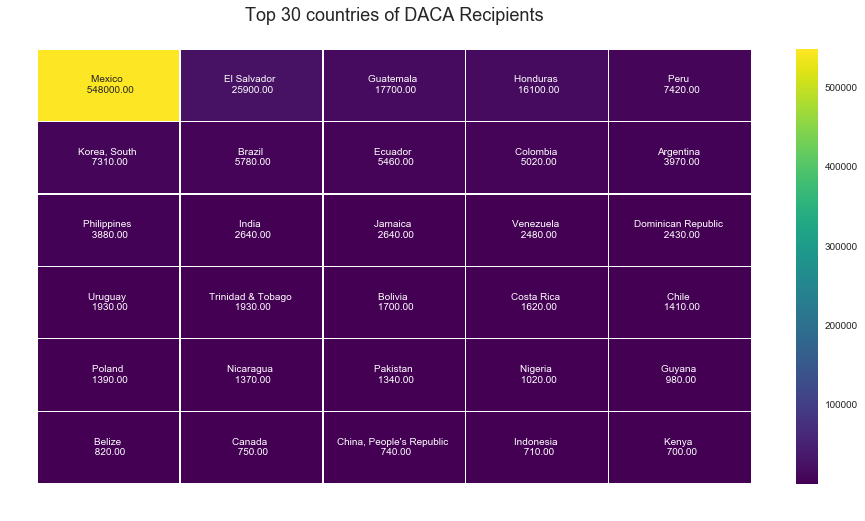

In [457]:
df_rec_country_top30 = df_rec_country.head(30)
country_name = ((np.asarray(df_rec_country_top30['Country'])).reshape(6,5))
count = ((np.asarray(df_rec_country_top30['Recipients'])).reshape(6,5))
result = df_rec_country_top30.pivot(index='Yrows',columns='Xcols',values='Recipients')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb,value in zip(country_name.flatten(),
                                            count.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(16,8))
title = 'Top 30 countries of DACA Recipients'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='viridis',linewidths=0.30,ax=ax)
plt.show()

### Top 30 DACA Recipients US State as of 2017

In [458]:
df_rec_state = pd.read_excel('data/daca_recipients_state.xls',header=1)
for lab, row in df_rec_state.iterrows() :
    df_rec_state["State_Share"] = round(df_rec_state["Recipients"]/df_rec_state['Recipients'].sum()  * 100,1)
df_rec_state.head(10)

,State,Recipients,Yrows,Xcols,State_Share
0,California,197900,1.0,1.0,28.7
1,Texas,113000,1.0,2.0,16.4
2,Illinois,35600,1.0,3.0,5.2
3,New York,32900,1.0,4.0,4.8
4,Florida,27000,1.0,5.0,3.9
5,Arizona,25500,2.0,1.0,3.7
6,North Carolina,25100,2.0,2.0,3.6
7,Georgia,21600,2.0,3.0,3.1
8,New Jersey,17400,2.0,4.0,2.5
9,Washington,16300,2.0,5.0,2.4


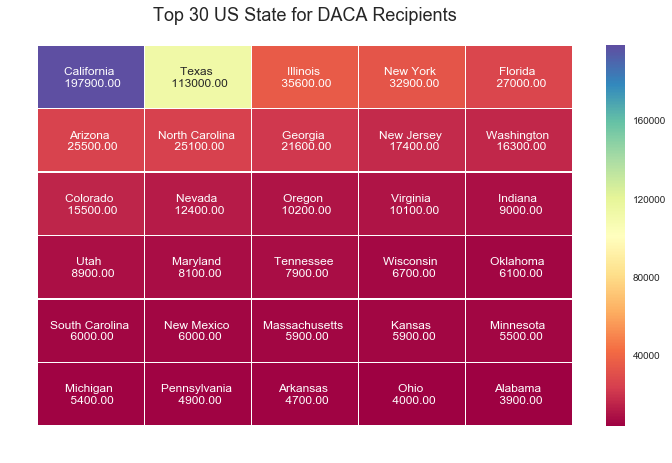

In [355]:
df_rec_state_top30 = df_rec_state.head(30)
symbol = ((np.asarray(df_rec_state_top30['State'])).reshape(6,5))
percentage = ((np.asarray(df_rec_state_top30['Recipients'])).reshape(6,5))
result = df_rec_state_top30.pivot(index='Yrows',columns='Xcols',values='Recipients')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb,value in zip(symbol.flatten(),
                                            percentage.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(12,7))
title = 'Top 30 US State for DACA Recipients'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='Spectral',linewidths=0.30,ax=ax)
plt.show()


### Sex Ratio of DACA Recipients as of 2017

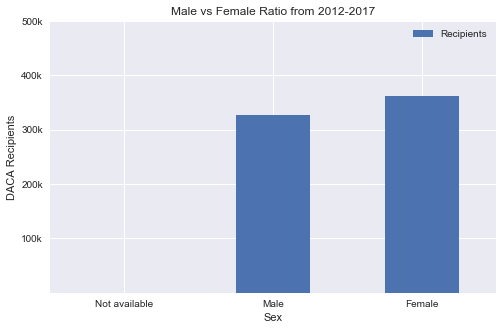

In [459]:
df_rec_sex = pd.read_excel('data/daca_sex_ratio.xls',header=1)
df_rec_sex_top5 = df_rec_sex.head(5)
sns.set()
df_rec_sex_top5.sort_values(by='Recipients')[-5:].plot(x='Sex',kind='bar',figsize=(8,5))
plt.xlabel('Sex')
plt.ylabel('DACA Recipients')
plt.title('Male vs Female Ratio from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Age range of DACA Recipients as of 2017

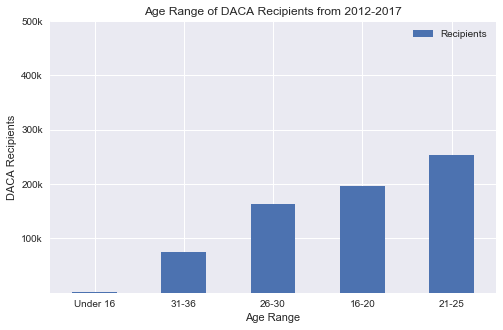

In [460]:
df_rec_age = pd.read_excel('data/daca_recipients_age.xls',header=1)
df_rec_age_top5 = df_rec_age.head(5)
sns.set()
df_rec_age_top5.sort_values(by='Recipients')[-5:].plot(x='Age',kind='bar',figsize=(8,5))
plt.xlabel('Age Range')
plt.ylabel('DACA Recipients')
plt.title('Age Range of DACA Recipients from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Maritial Status of DACA Recipients as of 2017

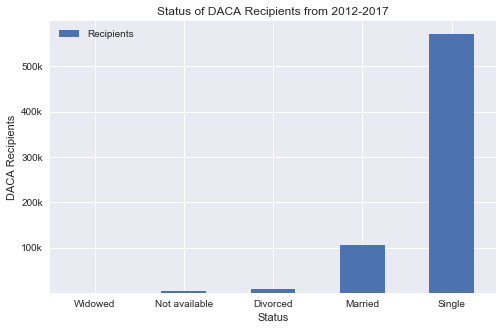

In [461]:
df_rec_status = pd.read_excel('data/daca_recipients_status.xls',header=1)
df_rec_status_top5 = df_rec_status.head(5)
sns.set()
df_rec_status_top5.sort_values(by='Recipients')[-5:].plot(x='Status',kind='bar',figsize=(8,5))
plt.xlabel('Status')
plt.ylabel('DACA Recipients')
plt.title('Status of DACA Recipients from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### Calculate the number of countries benefited by DACA and their average mean

In [462]:
# Remove all null from DACA country recipients
df_rec_country_all = pd.read_excel('data/daca_recipients_country.xls',header=1)
clean_df_rec_country_all = df_rec_country_all[np.logical_not(df_rec_country_all['Recipients'].isnull())]
print('Number of countries: {}'.format(len(clean_df_rec_country_all)))
print('Mean excess DACA Recipient ratio: {:.4f}'.format(clean_df_rec_country_all['Recipients'].mean()))

Number of countries: 151
Mean excess DACA Recipient ratio: 4570.3974


### Let's divide the countries benefitted by DACA into two groups and calculate their mean
1. Less than 1000 recipients
2. More than 1000 recipients

In [463]:

df_less_1000 = clean_df_rec_country_all[(clean_df_rec_country_all['Recipients'] < 1000) & (clean_df_rec_country_all['Recipients'] > 0)]
print('Number of countries with < 1000 DACA Recipients: {}'.format(len(df_less_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_less_1000['Recipients'].mean()))


df_great_1000 = clean_df_rec_country_all[clean_df_rec_country_all['Recipients'] > 10000]
print('\nNumber of countries with > 1000 DACA Recipients: {}'.format(len(df_great_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_great_1000['Recipients'].mean()))


Number of countries with < 1000 DACA Recipients: 126
Mean excess Recipients rate: 141.984

Number of countries with > 1000 DACA Recipients: 4
Mean excess Recipients rate: 151925.000


### Compute and report the observed significance value (or p-value).

In [464]:
import statsmodels.stats.api as sms
from pandas.core import datetools
two_sample = st.ttest_ind(df_less_1000['Recipients'], 
                          df_great_1000['Recipients'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_1000['Recipients']), 
                      sms.DescrStatsW(df_great_1000['Recipients']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (-923030.943, 619464.912).
The t-statistic is -7.392 and the p-value is 0.00000000.


### Plot a histogram for group less than 1000 recipients.

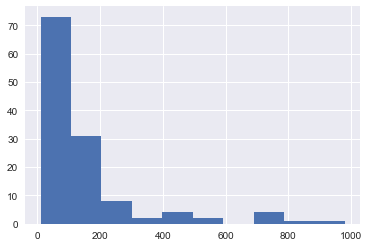

In [465]:
plt.hist(df_less_1000['Recipients'])
plt.show()

In the above figure, we clearly notice that the distribution is not a normal one.It is a left skewed plot.

### Calculate the ECDF and plot them in a graph

In [466]:
for lab, row in df_less_1000.iterrows() :
    df_less_1000["Country_Share"] = round(df_less_1000["Recipients"]/df_less_1000['Recipients'].sum()  * 100,1)
df_less_1000.head(10)

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Recipients,Yrows,Xcols,Country_Share
24,Guyana,980,5.0,5.0,5.5
25,Belize,820,6.0,1.0,4.6
26,Canada,750,6.0,2.0,4.2
27,"China, People's Republic",740,6.0,3.0,4.1
28,Indonesia,710,6.0,4.0,4.0
29,Kenya,700,6.0,5.0,3.9
30,Portugal,520,7.0,1.0,2.9
31,United Kingdom,500,7.0,2.0,2.8
32,Bangladesh,490,7.0,3.0,2.7
33,Ghana,490,7.0,4.0,2.7


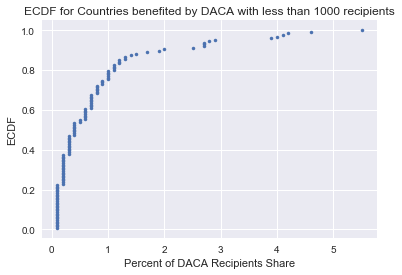

In [468]:
import numpy as np
x= np.sort(df_less_1000['Country_Share'])
y = np.arange(1,len(x) + 1)/len(x)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.title('ECDF for Countries benefited by DACA with less than 1000 recipients')
_ = plt.xlabel('Percent of DACA Recipients Share')
_ = plt.ylabel('ECDF')
plt.margins(0.05)

### Calculate the median for the two groups (Less than 1000 and greater than 1000)

In [469]:
print('The number of countries which has more than 1000 recipients',len(df_great_1000))
print('The median of these countries is',np.median(df_great_1000['Recipients']))

print('The number of countries which has less than 1000 recipients',len(df_less_1000))
print('The median of these countries is',np.median(df_less_1000['Recipients']))


The number of countries which has more than 1000 recipients 4
The median of these countries is 21800.0
The number of countries which has less than 1000 recipients 126
The median of these countries is 75.0


### Calculate the percentile for both groups

In [470]:
print('The percentile for countries having less than 1000 DACA Recipients ',np.percentile(df_less_1000['Recipients'],[25,50,75]))
print('The percentile for countries having greater than 1000 DACA Recipients ',np.percentile(df_great_1000['Recipients'],[25,50,75]))

The percentile for countries having less than 1000 DACA Recipients  [  30.    75.   167.5]
The percentile for countries having greater than 1000 DACA Recipients  [  17300.   21800.  156425.]


### Calculate the variance

In [471]:
print('The variance for countries less than 1000 DACA recipients',np.sqrt(np.var(df_less_1000)))
print('The variance for countries less than 1000 DACA recipients',np.sqrt(np.var(df_great_1000)))

The variance for countries less than 1000 DACA recipients Recipients       183.532445
Yrows              1.790250
Xcols              1.435393
Country_Share      1.024564
dtype: float64
The variance for countries less than 1000 DACA recipients Recipients    228704.223562
Yrows              0.000000
Xcols              1.118034
dtype: float64


### Calculate the Logistic Regression for Overall Case Status

In [472]:
df_case_status = df = pd.read_excel('data/case-status.xls',header=1)
df_case_status.head()

,Year,Type,Accepted,Rejected,Received,Average,Biometrics,Review,Approved,Denied,Pending,Target
0,2012,Initial,152431,5395,157826,3629,124055.0,38024.0,1680,0,150751,1
1,2013,Initial,427616,16351,443967,1697,445013.0,77747.0,470352,10975,97040,0
2,2014,Initial,122424,19127,141551,488,NaN,NaN,136101,20989,62374,1
3,2014,Renewal,116476,5760,122236,1370,NaN,NaN,22235,0,94238,0
4,2015,Initial,85303,7477,92780,338,NaN,NaN,90613,19070,37994,1


In [473]:
from scipy.stats import spearmanr
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [474]:
case_data = df_case_status.ix[:,(8,9)].values
case_data_name = ['Appr','Deny']
y = df_case_status.ix[:,11].values

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


#Checking for independence between features

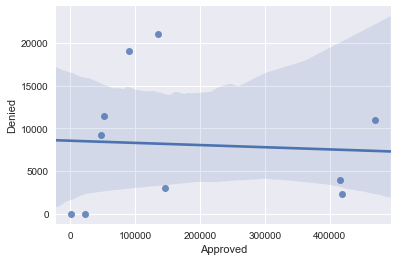

In [475]:
sns.regplot(x='Approved',y='Denied',data=df_case_status,scatter=True)

In [476]:
Appr = df_case_status['Approved']
Deny = df_case_status['Denied']
spearmanr_coefficient,p_value = spearmanr(Appr,Deny)
print('Spearmanr Rank Correlation Coefficient %0.3f' % spearmanr_coefficient )

Spearmanr Rank Correlation Coefficient 0.267


#Check for missing values

In [477]:
df_case_status.isnull().sum()

Year          0
Type          0
Accepted      0
Rejected      0
Received      0
Average       0
Biometrics    8
Review        8
Approved      0
Denied        0
Pending       0
Target        0
dtype: int64

#Check that your target variable is binary or cardinal

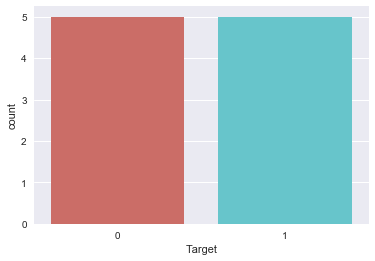

In [478]:
sns.countplot(x='Target',data =df_case_status,palette='hls' )

#Checks the size of data is sufficient

In [479]:
df_case_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
Year          10 non-null int64
Type          10 non-null object
Accepted      10 non-null int64
Rejected      10 non-null int64
Received      10 non-null int64
Average       10 non-null int64
Biometrics    2 non-null float64
Review        2 non-null float64
Approved      10 non-null int64
Denied        10 non-null int64
Pending       10 non-null int64
Target        10 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.0+ KB


We need to have atleast 50 observations for each predictor. We are using 2 predictor so we should have atleast 100 observation. But as per the information above we only have 10 observation. For the purpose of this demonstration we will continue to work with the Logistic model.

#Deploying and Evaluating the model

In [480]:
X = scale(case_data)

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [481]:
LogReg = LogisticRegression()
LogReg.fit(X,y)
print (LogReg.score(X,y))

1.0


In [482]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        10



#Conclusion
We see that total precision is 1, recall is 1 which seems to be a perfect fit. Even though the datasets were not sufficient to explore the logistic model, We have walked through the complete logistic model. 